In [1]:
import pandas as pd 
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

df_flight_01_12 = pd.read_csv("/home/subin/Downloads/incheon_flight_time_2023/incheon_flight_time_202301_202312.csv")
df_naver_osaka_26 = pd.read_csv("/home/subin/Downloads/test_making_chart 2/making_chart 2/_naver_osaka_26.csv")
df_naver_osaka_27 = pd.read_csv("/home/subin/Downloads/test_making_chart 2/making_chart 2/_naver_osaka_27.csv")



In [2]:
df_flight_01_12

,시간,도착,출발
0,00:00 – 00:59,837,1470
1,01:00 – 01:59,333,1400
2,02:00 – 02:59,89,1190
3,03:00 – 03:59,999,265
4,04:00 – 04:59,5008,26
5,05:00 – 05:59,7488,14
6,06:00 – 06:59,9651,1683
7,07:00 – 07:59,7241,5381
8,08:00 – 08:59,5217,10805
9,09:00 – 09:59,4615,10845


In [3]:
# 시간열을 시간 형식으로 변환
df_flight_01_12['시간'] = pd.to_datetime(df_flight_01_12['시간'].str.split(' – ', expand=True)[0])


/tmp/ipykernel_14301/847318295.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_flight_01_12['시간'] = pd.to_datetime(df_flight_01_12['시간'].str.split(' – ', expand=True)[0])


In [4]:
# 7시에서 19시까지의 데이터 선택
df_selected = df_flight_01_12[(df_flight_01_12['시간'].dt.hour >= 7) & (df_flight_01_12['시간'].dt.hour <= 20)]

# 결과 출력
df_selected

,시간,도착,출발
7,2024-01-24 07:00:00,7241,5381
8,2024-01-24 08:00:00,5217,10805
9,2024-01-24 09:00:00,4615,10845
10,2024-01-24 10:00:00,4576,10810
11,2024-01-24 11:00:00,6781,9120
12,2024-01-24 12:00:00,7124,7992
13,2024-01-24 13:00:00,7251,7680
14,2024-01-24 14:00:00,7392,7122
15,2024-01-24 15:00:00,9327,7312
16,2024-01-24 16:00:00,10600,6519


In [5]:
df_flight_01_12 = pd.read_csv("/home/subin/Downloads/incheon_flight_time_2023/incheon_flight_time_202301_202312.csv")

In [6]:
df_selected['시간'] = df_flight_01_12['시간']

/tmp/ipykernel_14301/2751445812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['시간'] = df_flight_01_12['시간']


In [7]:
df_selected

,시간,도착,출발
7,07:00 – 07:59,7241,5381
8,08:00 – 08:59,5217,10805
9,09:00 – 09:59,4615,10845
10,10:00 – 10:59,4576,10810
11,11:00 – 11:59,6781,9120
12,12:00 – 12:59,7124,7992
13,13:00 – 13:59,7251,7680
14,14:00 – 14:59,7392,7122
15,15:00 – 15:59,9327,7312
16,16:00 – 16:59,10600,6519


In [8]:
df_selected.reset_index(drop=True, inplace=True)

In [9]:
df_selected

,시간,도착,출발
0,07:00 – 07:59,7241,5381
1,08:00 – 08:59,5217,10805
2,09:00 – 09:59,4615,10845
3,10:00 – 10:59,4576,10810
4,11:00 – 11:59,6781,9120
5,12:00 – 12:59,7124,7992
6,13:00 – 13:59,7251,7680
7,14:00 – 14:59,7392,7122
8,15:00 – 15:59,9327,7312
9,16:00 – 16:59,10600,6519


In [10]:
df_selected["출발"][0]

5381

In [11]:
len(df_selected)

14

In [12]:
hour = 1
hour_form = f'{hour:02d}' 
hour_form, type(hour_form)

('01', str)

In [13]:
new_time_list = []
new_dep_list = []

for i in range(0,13):
    hour = i+7
    hour_form = f'{hour:02d}' #00

    for j in range(0,12):
        front_value = df_selected["출발"][i]
        back_value = df_selected["출발"][i+1]
        scale = abs((front_value - back_value))/12
        minute = j*5
        minute_form =  f'{minute:02d}' #05

        #만약 뒤에 값이 더 크면 ++, 앞에 값이 더 크면 ---
        if back_value >= front_value:
            tmp_price_scale_value = front_value+(scale*j)
        else:
            tmp_price_scale_value = front_value-(scale*j)

        time_form = hour_form+":"+minute_form

        new_time_list.append(time_form)
        new_dep_list.append(tmp_price_scale_value)


new_time_list, new_dep_list
        


(['07:00',
  '07:05',
  '07:10',
  '07:15',
  '07:20',
  '07:25',
  '07:30',
  '07:35',
  '07:40',
  '07:45',
  '07:50',
  '07:55',
  '08:00',
  '08:05',
  '08:10',
  '08:15',
  '08:20',
  '08:25',
  '08:30',
  '08:35',
  '08:40',
  '08:45',
  '08:50',
  '08:55',
  '09:00',
  '09:05',
  '09:10',
  '09:15',
  '09:20',
  '09:25',
  '09:30',
  '09:35',
  '09:40',
  '09:45',
  '09:50',
  '09:55',
  '10:00',
  '10:05',
  '10:10',
  '10:15',
  '10:20',
  '10:25',
  '10:30',
  '10:35',
  '10:40',
  '10:45',
  '10:50',
  '10:55',
  '11:00',
  '11:05',
  '11:10',
  '11:15',
  '11:20',
  '11:25',
  '11:30',
  '11:35',
  '11:40',
  '11:45',
  '11:50',
  '11:55',
  '12:00',
  '12:05',
  '12:10',
  '12:15',
  '12:20',
  '12:25',
  '12:30',
  '12:35',
  '12:40',
  '12:45',
  '12:50',
  '12:55',
  '13:00',
  '13:05',
  '13:10',
  '13:15',
  '13:20',
  '13:25',
  '13:30',
  '13:35',
  '13:40',
  '13:45',
  '13:50',
  '13:55',
  '14:00',
  '14:05',
  '14:10',
  '14:15',
  '14:20',
  '14:25',
  '14:30',

In [14]:
new_dep_list


[5381.0,
 5833.0,
 6285.0,
 6737.0,
 7189.0,
 7641.0,
 8093.0,
 8545.0,
 8997.0,
 9449.0,
 9901.0,
 10353.0,
 10805.0,
 10808.333333333334,
 10811.666666666666,
 10815.0,
 10818.333333333334,
 10821.666666666666,
 10825.0,
 10828.333333333334,
 10831.666666666666,
 10835.0,
 10838.333333333334,
 10841.666666666666,
 10845.0,
 10842.083333333334,
 10839.166666666666,
 10836.25,
 10833.333333333334,
 10830.416666666666,
 10827.5,
 10824.583333333334,
 10821.666666666666,
 10818.75,
 10815.833333333334,
 10812.916666666666,
 10810.0,
 10669.166666666666,
 10528.333333333334,
 10387.5,
 10246.666666666666,
 10105.833333333334,
 9965.0,
 9824.166666666666,
 9683.333333333334,
 9542.5,
 9401.666666666666,
 9260.833333333334,
 9120.0,
 9026.0,
 8932.0,
 8838.0,
 8744.0,
 8650.0,
 8556.0,
 8462.0,
 8368.0,
 8274.0,
 8180.0,
 8086.0,
 7992.0,
 7966.0,
 7940.0,
 7914.0,
 7888.0,
 7862.0,
 7836.0,
 7810.0,
 7784.0,
 7758.0,
 7732.0,
 7706.0,
 7680.0,
 7633.5,
 7587.0,
 7540.5,
 7494.0,
 7447.5,
 

In [15]:
for j in range(0,12):
    print( j*5)

0
5
10
15
20
25
30
35
40
45
50
55


In [16]:
data = {"시간": new_time_list,
        "출발": new_dep_list}
df_new_incheon = pd.DataFrame(data)

In [17]:
df_new_incheon

,시간,출발
0,07:00,5381.0
1,07:05,5833.0
2,07:10,6285.0
3,07:15,6737.0
4,07:20,7189.0
...,...,...
151,19:35,8906.5
152,19:40,8975.0
153,19:45,9043.5
154,19:50,9112.0


In [18]:


# '시간대' 열을 추가
df_new_incheon['시간대'] = pd.to_datetime(df_new_incheon['시간'], format='%H:%M').dt.strftime('%H:00')
df_new_incheon

,시간,출발,시간대
0,07:00,5381.0,07:00
1,07:05,5833.0,07:00
2,07:10,6285.0,07:00
3,07:15,6737.0,07:00
4,07:20,7189.0,07:00
...,...,...,...
151,19:35,8906.5,19:00
152,19:40,8975.0,19:00
153,19:45,9043.5,19:00
154,19:50,9112.0,19:00


In [19]:
df_new_incheon.head(30)

,시간,출발,시간대
0,07:00,5381.000000,07:00
1,07:05,5833.000000,07:00
2,07:10,6285.000000,07:00
3,07:15,6737.000000,07:00
4,07:20,7189.000000,07:00
5,07:25,7641.000000,07:00
6,07:30,8093.000000,07:00
7,07:35,8545.000000,07:00
8,07:40,8997.000000,07:00
9,07:45,9449.000000,07:00


In [20]:
import pandas as pd

# "07:00"을 timedelta로 변환
time_str = "07:00"
time_delta = pd.to_timedelta(time_str + ":00")

print(time_delta)


0 days 07:00:00


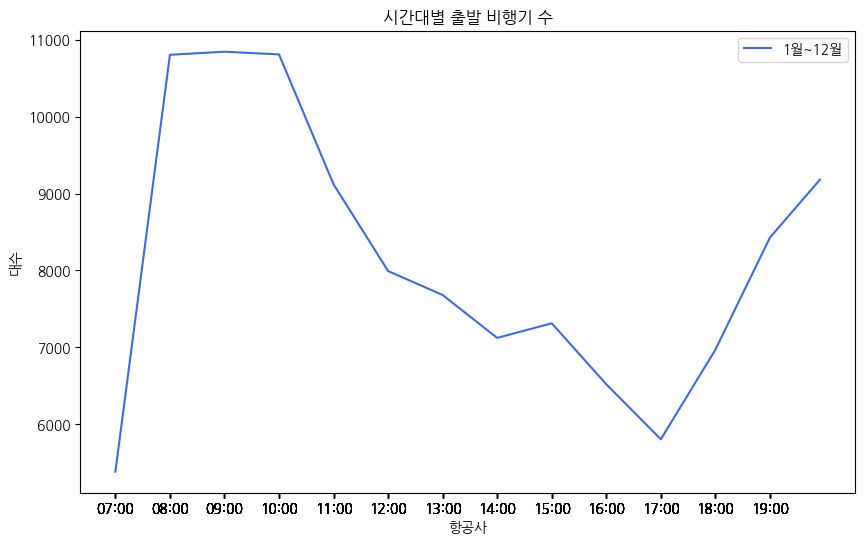

In [29]:
import koreanize_matplotlib
plt.figure(figsize=(10, 6))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FFA07A', '#20B2AA', '#8A2BE2', '#FF4500', '#00FA9A']


plt.plot(df_new_incheon["시간"], df_new_incheon["출발"], label="1월~12월", color='royalblue')
plt.xticks(df_new_incheon["시간대"]) 
plt.title('시간대별 출발 비행기 수')
plt.xlabel('항공사')
plt.ylabel('대수')
plt.legend()  # 범례 추가


plt.show()

In [22]:
df_naver_osaka_26.reset_index(drop=True, inplace=True)
df_naver_osaka_26 = df_naver_osaka_26.loc[:, ~df_naver_osaka_26.columns.str.contains('^Unnamed')]

In [23]:
df_naver_osaka_27.reset_index(drop=True, inplace=True)
df_naver_osaka_27 = df_naver_osaka_27.loc[:, ~df_naver_osaka_27.columns.str.contains('^Unnamed')]

In [24]:
df_naver_osaka_26

,항공사,편명,출발시간,평균가격
0,제주항공,7C 1304,07:00,225030.0
1,티웨이항공,TW 281,07:55,258376.0
2,아시아나항공,OZ 112,08:05,290501.0
3,대한항공,KE 723,09:00,314793.0
4,제주항공,7C 1302,09:10,256985.0
5,no_air,no_flight,09:40,256985.0
6,티웨이항공,TW 283,12:10,199175.0
7,no_air2,no_flight2,12:25,199175.0
8,아시아나항공,OZ 114,14:10,241427.0
9,티웨이항공,TW 285,14:40,204158.0


In [25]:
df_naver_osaka_27


,항공사,편명,출발시간,평균가격
0,제주항공,7C 1304,07:00,241304.0
1,티웨이항공,TW 281,07:55,216352.0
2,아시아나항공,OZ 112,08:05,290729.0
3,대한항공,KE 723,09:00,314261.0
4,제주항공,7C 1302,09:10,242570.0
5,제주항공,7C 1308,09:40,260987.0
6,티웨이항공,TW 283,12:10,208368.0
7,아시아나항공,OZ 118,12:25,220557.0
8,아시아나항공,OZ 114,14:10,241967.0
9,티웨이항공,TW 285,14:40,186506.0


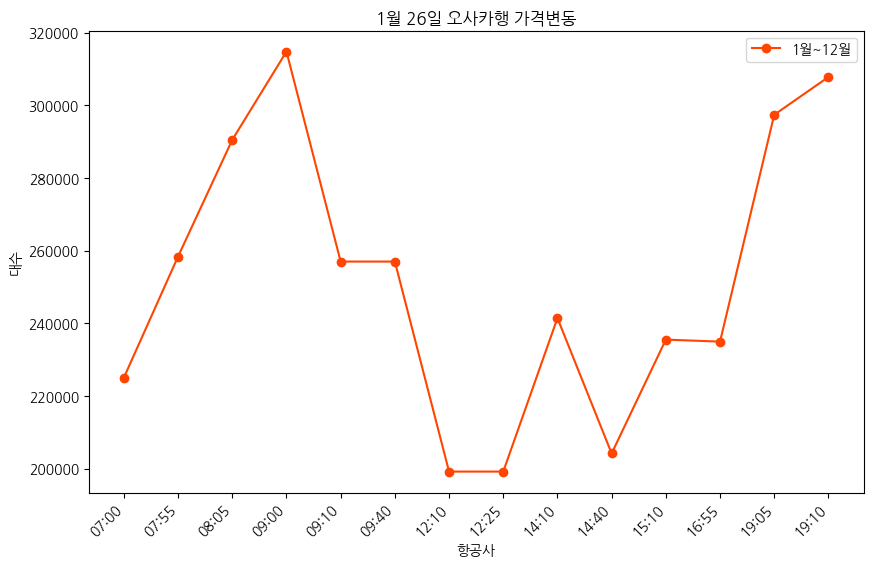

In [31]:
import koreanize_matplotlib
plt.figure(figsize=(10, 6))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FFA07A', '#20B2AA', '#8A2BE2', '#FF4500', '#00FA9A']


plt.plot(df_naver_osaka_26["출발시간"], df_naver_osaka_26["평균가격"],  marker='o', label="1월~12월", color='orangered')
plt.xticks(rotation=45, ha='right') 
plt.title('1월 26일 오사카행 가격변동')
plt.xlabel('항공사')
plt.ylabel('대수')
plt.legend()  # 범례 추가

plt.show()

In [271]:
from matplotlib.ticker import MultipleLocator

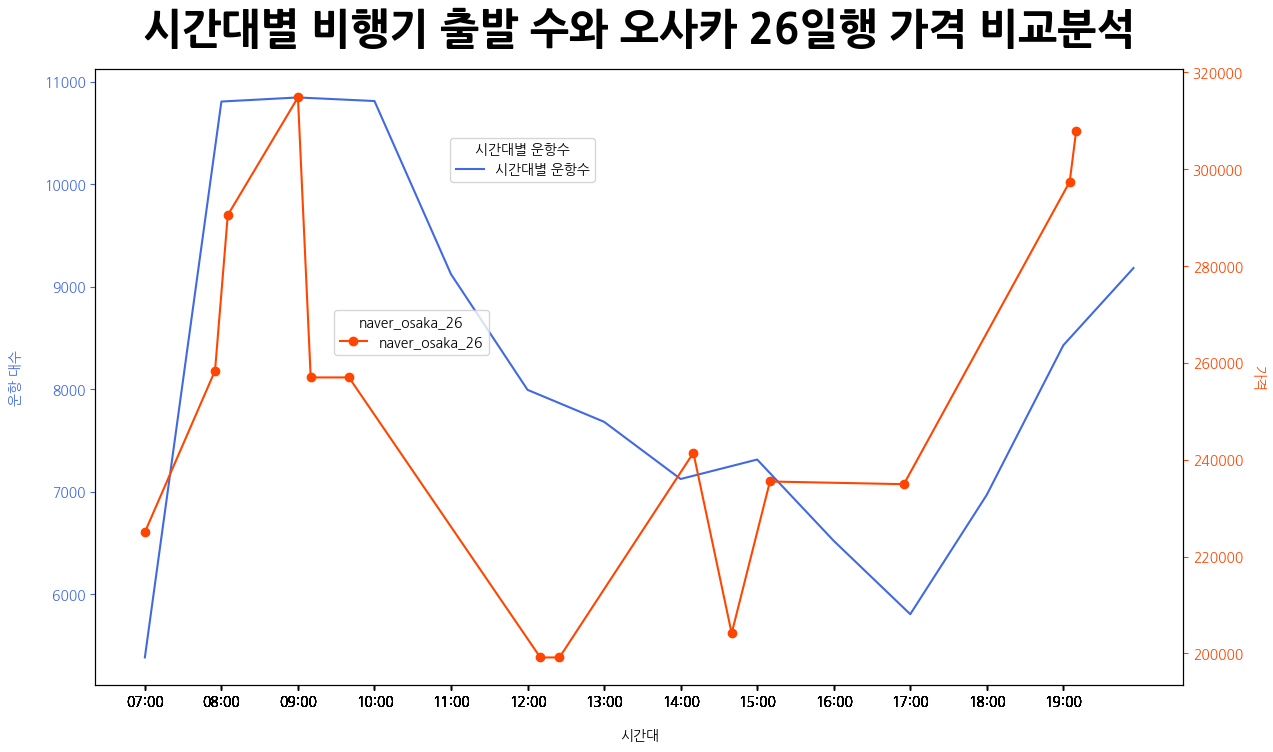

In [27]:
import koreanize_matplotlib

# 첫 번째 y축에 데이터 그리기
fig, ax1 = plt.subplots(figsize=(15, 8))
ax1.plot(df_new_incheon["시간"], df_new_incheon["출발"], color='royalblue', label='시간대별 운항수')
ax1.set_xlabel('시간대', labelpad=15)
ax1.set_ylabel('운항 대수', color='royalblue',labelpad=15)
ax1.tick_params('y', colors='royalblue')

# 두 번째 y축 생성
ax2 = ax1.twinx()
ax2.plot(df_naver_osaka_26["출발시간"], df_naver_osaka_26["평균가격"], marker='o',color='orangered', label='naver_osaka_26')
ax2.set_ylabel('가격', color='orangered', rotation=270, labelpad=15)
ax2.tick_params('y', colors='orangered')

ax1_legend_label = '시간대별 운항수'
ax2_legend_label = 'naver_osaka_26'

# Legends added for ax1 and ax2
ax1.legend(loc='upper left', bbox_to_anchor=(0.32, 0.9), fontsize='medium', title=ax1_legend_label)
ax2.legend(loc='upper left', bbox_to_anchor=(0.213, 0.62), fontsize='medium', title=ax2_legend_label)

# Adjust layout to make room for the legends
plt.subplots_adjust(right=0.85)

plt.xticks(df_new_incheon["시간대"])

plt.title('시간대별 비행기 출발 수와 오사카 26일행 가격 비교분석',fontsize= 30, fontweight='bold', pad = 20)

# 그래프 표시
plt.show()



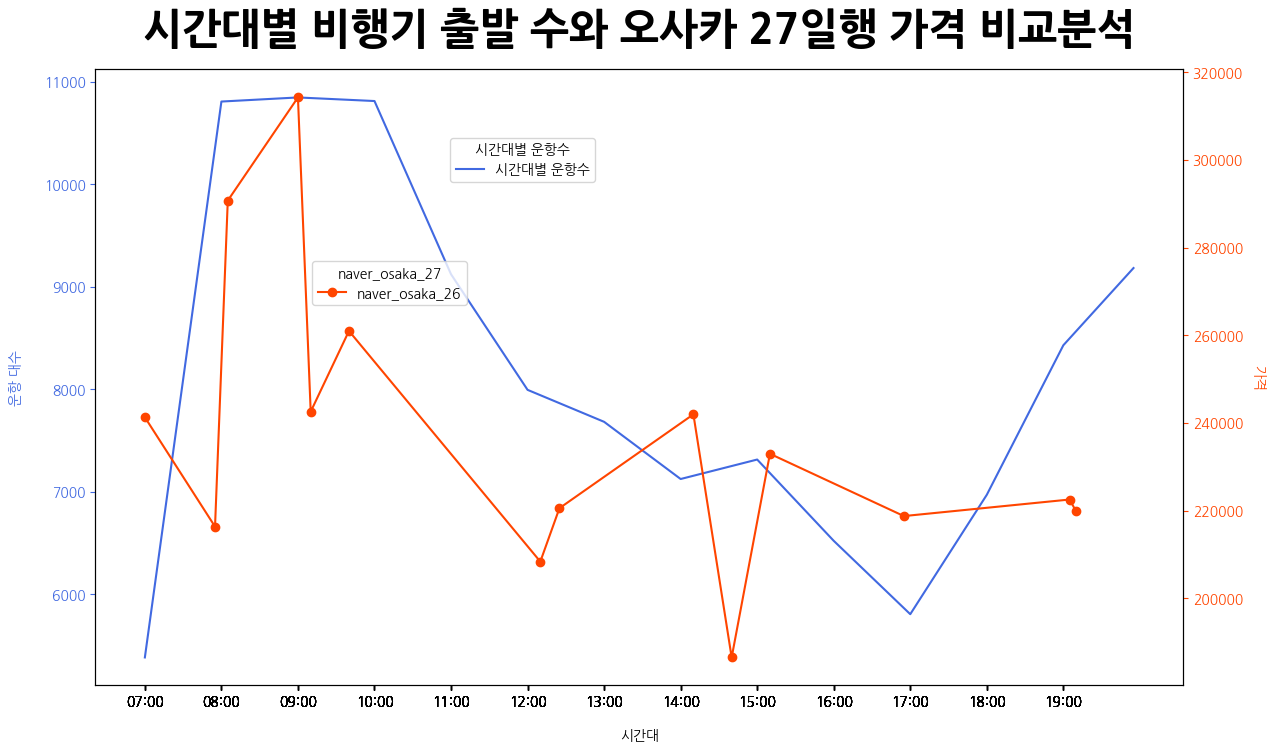

In [28]:
# 첫 번째 y축에 데이터 그리기
fig, ax1 = plt.subplots(figsize=(15, 8))
ax1.plot(df_new_incheon["시간"], df_new_incheon["출발"], color='royalblue', label='시간대별 운항수')
ax1.set_xlabel('시간대', labelpad=15)
ax1.set_ylabel('운항 대수', color='royalblue',labelpad=15)
ax1.tick_params('y', colors='royalblue')

# 두 번째 y축 생성
ax2 = ax1.twinx()
ax2.plot(df_naver_osaka_27["출발시간"], df_naver_osaka_27["평균가격"], marker='o',color='orangered', label='naver_osaka_26')
ax2.set_ylabel('가격', color='orangered', rotation=270, labelpad=15)
ax2.tick_params('y', colors='orangered')

ax1_legend_label = '시간대별 운항수'
ax2_legend_label = 'naver_osaka_27'

# Legends added for ax1 and ax2
ax1.legend(loc='upper left', bbox_to_anchor=(0.32, 0.9), fontsize='medium', title=ax1_legend_label)
ax2.legend(loc='upper left', bbox_to_anchor=(0.193, 0.7), fontsize='medium', title=ax2_legend_label)

# Adjust layout to make room for the legends
plt.subplots_adjust(right=0.85)

plt.xticks(df_new_incheon["시간대"])

plt.title('시간대별 비행기 출발 수와 오사카 27일행 가격 비교분석',fontsize= 30, fontweight='bold', pad = 20)

# 그래프 표시
plt.show()
